In [5]:
import numpy as np
import pandas as pd
from unidecode import unidecode
from difflib import SequenceMatcher

One of the most contentious and seemingly arbitrary aspects of the sport of mixed martial arts is judging decisions. If you're not familiar, every fight is either 3 or 5 rounds, and if a finish isnt achieved within the time limit, 3 judges will have judged each individual round. Each round is based off of a 10 point must system, awarding the chosen winner 10 and the loser less than 10.

Judging has been critisized by fans and fighters alike due to the vagueness of how much factors like damage, control time, grappling, octogon control, etc. are actually valued in an assessment of a round. The goal of this project is to analyze historical data across all UFC rounds, in addition to fan/media agreement on decisions. 

This notebook takes data from python code that web srapes two sites: mmadecisions.com (for decisions/ fan and media scoring) and UFCstats.com (for round by round statistics). These scripts utilizes microprocessing to optimize the time it takes to gether all the information. We start by converting the combined csv files to a 103x2306 dataframe.

In [6]:
UFC_df = pd.read_csv('output.csv')
UFC_df.head(15)
#method: 0= KO/TKO, 1= Submission, 2 =Unanimous decision, 3=Split decision, 4=NC/DRAW

,Number_of_Rounds,Opponent_A_Wins,Method,Opponent_A,Total_Strikes_Attempted_(A),Round_1_Sig_Strikes_Attempted_(A),Round_1_Sig_Strikes_Landed_(A),Round_1_KD_(A),Round_1_TD_(A),Round_1_Sub_Attempts_(A),...,Rd2C,Rd3C,Rd4C,Rd5C,Media score ratio of agreement,Rd1 Fans,Rd2 Fans,Rd3 Fans,Rd4 Fans,Rd5 Fans
0,5,1,2,Mackenzie Dern,340,42,23,1,0,0,...,-1,2,1,2,1.0,1.622,-0.828,2.043,0.926,1.741
1,3,1,2,Karolina Kowalkiewicz,249,84,42,0,0,0,...,1,1,--,--,1.0,NaN,NaN,NaN,NaN,NaN
2,3,0,3,Ilir Latifi,105,44,28,0,0,0,...,-1,-1,--,--,0.923,0.842,-0.684,0.316,NaN,NaN
3,3,1,2,Chase Hooper,340,101,60,0,0,0,...,1,1,--,--,1.0,1.267,0.999,1.001,NaN,NaN
4,3,0,2,Takashi Sato,76,8,3,0,1,0,...,1,1,--,--,1.0,NaN,NaN,NaN,NaN,NaN
5,3,0,2,Anthony Smith,95,22,10,0,1,0,...,-1,1,--,--,1.0,0.955,0.254,1.150,NaN,NaN
6,3,1,2,Karl Williams,191,43,19,0,1,0,...,-1,1,--,--,1.0,0.914,-0.392,-0.044,NaN,NaN
7,3,0,2,Cody Stamann,152,39,14,0,1,0,...,1,-1,--,--,0.714,0.531,0.698,-1.094,NaN,NaN
8,3,0,3,Ji Yeon Kim,62,5,1,0,0,0,...,-1,-1,--,--,0.091,-0.696,0.033,0.043,NaN,NaN
9,5,1,3,Aljamain Sterling,261,34,20,0,2,0,...,1,-1,1,-1,0.913,0.904,-0.330,-0.167,0.826,-0.890


First, the data needs to be cleansed, to store the data in rows of 8 as individual round statistics for the round winner instead of total fight statistics.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def get_sec(time_str):
    m, s = time_str.split(':')
    return int(m) * 60 + int(s)
new_columns =[ 'Round score', 'Sig_Strikes_Attempted','Sig_Strikes_Attempted_Opp', 'Sig_Strikes_Landed','Sig_Strikes_Landed_Opp','KD','KD_Opp','TD','TD_Opp','Sub_Attempts','Sub_Attempts_Opp','Ctrl_Time','Ctrl_Time_Opp','Head_Strikes', 'Head_Strikes_Opp']
fans_columns =['fan score']
rounds_df = pd.DataFrame(columns=new_columns)
fans_df = pd.DataFrame(columns=fans_columns)
for rowtuple in UFC_df.itertuples():
    row= list(rowtuple)[1:]
    list1 =[int(row [82]),int(row [87]), int(row [92])]
    round1avg = max(set(list1), key=list1.count)
    
    list2 =[int(row [83]),int(row [88]), int(row [93])]
    round2avg = max(set(list2), key=list2.count)

    list3 =[int(row [84]),int(row [89]), int(row [94])]
    round3avg = max(set(list3), key=list3.count)

    if((row[85] != 'nan') & (row[85] != '--')):
        list4 =[int(row [85]),int(row [90]), int(row [95])]
        round4avg = max(set(list4), key=list4.count)
        list5 =[int(row [86]),int(row [91]), int(row [96])]
        round5avg = max(set(list5), key=list5.count)

    else:
        round4avg ='skip'
        round5avg ='skip'

    round1infoA = row[5:12]
    round2infoA = row[12:19]
    round3infoA = row[19:26]
    round4infoA = row[26:33]
    round5infoA = row[33:40]

    round1infoB = row[42:49]
    round2infoB = row[49:56]
    round3infoB = row[56:63]
    round4infoB = row[63:70]
    round5infoB = row[70:77]

    if(row[80]=='DRAW'):
        if(  SequenceMatcher(a=unidecode(row[81]).lower(), b=unidecode(row[3]).lower()).ratio() >=0.8):
            templist =[round1infoA,round2infoA,round3infoA,round4infoA,round5infoA,
                    round1infoB,round2infoB,round3infoB,round4infoB,round5infoB]
        else:
            templist =[round1infoB,round2infoB,round3infoB,round4infoB,round5infoB,
                    round1infoA,round2infoA,round3infoA,round4infoA,round5infoA,]
    else:
        if (int(row[1])== 1):
            templist =[round1infoA,round2infoA,round3infoA,round4infoA,round5infoA,
                    round1infoB,round2infoB,round3infoB,round4infoB,round5infoB]
        else:
            templist =[round1infoB,round2infoB,round3infoB,round4infoB,round5infoB,
                    round1infoA,round2infoA,round3infoA,round4infoA,round5infoA,]
    
    for info in templist:
        if(info[5] != '--'):
            info[5] = get_sec(info[5])


    if(round1avg >= 0):
        rinfo =templist[0]
        rdata=[]
        rdata2=[]
        for idx in range(len(rinfo)):
            rdata.append(rinfo[idx])
            rdata.append(templist[5][idx])
            rdata2.append(templist[5][idx])
            rdata2.append(rinfo[idx])            
        rdata.insert(0, int(round1avg))       
        rdata2.insert(0, -int(round1avg))
        rounds_df.loc[len(rounds_df.index)] = rdata
        rounds_df.loc[len(rounds_df.index)] = rdata2
    else:
        rinfo =templist[5]
        rdata=[]
        rdata2=[]
        for idx in range(len(rinfo)):
            rdata.append(rinfo[idx])
            rdata.append(templist[0][idx])
            rdata2.append(templist[0][idx])
            rdata2.append(rinfo[idx])            
        rdata.insert(0, -int(round1avg))       
        rdata2.insert(0, int(round1avg))
        rounds_df.loc[len(rounds_df.index)] = rdata
        rounds_df.loc[len(rounds_df.index)] = rdata2                 
    fans_df.append(row[98])

    if(round2avg >= 0):
        rinfo =templist[1]
        rdata=[]
        rdata2=[]
        for idx in range(len(rinfo)):
            rdata.append(rinfo[idx])
            rdata.append(templist[6][idx])
            rdata2.append(templist[6][idx])
            rdata2.append(rinfo[idx])            
        rdata.insert(0, int(round2avg))       
        rdata2.insert(0, -int(round2avg))
        rounds_df.loc[len(rounds_df.index)] = rdata
        rounds_df.loc[len(rounds_df.index)] = rdata2               
    else:
        rinfo =templist[6]
        rdata=[]
        rdata2=[]
        for idx in range(len(rinfo)):
            rdata.append(rinfo[idx])
            rdata.append(templist[1][idx])
            rdata2.append(templist[1][idx])
            rdata2.append(rinfo[idx])            
        rdata.insert(0, -int(round2avg))       
        rdata2.insert(0, int(round2avg))
        rounds_df.loc[len(rounds_df.index)] = rdata
        rounds_df.loc[len(rounds_df.index)] = rdata2
    fans_df.append(row[99])             

    if(round3avg >= 0):
        rinfo =templist[2]
        rdata=[]
        rdata2=[]
        for idx in range(len(rinfo)):
            rdata.append(rinfo[idx])
            rdata.append(templist[7][idx])
            rdata2.append(templist[7][idx])
            rdata2.append(rinfo[idx])            
        rdata.insert(0, int(round3avg))       
        rdata2.insert(0, -int(round3avg))
        rounds_df.loc[len(rounds_df.index)] = rdata
        rounds_df.loc[len(rounds_df.index)] = rdata2
    fans_df.append(row[100])
                   
    else:
        rinfo =templist[7]
        rdata=[]
        rdata2=[]
        for idx in range(len(rinfo)):
            rdata.append(rinfo[idx])
            rdata.append(templist[2][idx])
            rdata2.append(templist[2][idx])
            rdata2.append(rinfo[idx])            
        rdata.insert(0, -int(round3avg))       
        rdata2.insert(0, int(round3avg))
        rounds_df.loc[len(rounds_df.index)] = rdata
        rounds_df.loc[len(rounds_df.index)] = rdata2             

    if(round4avg != 'skip'):
        if(round4avg >= 0):
            rinfo =templist[3]
            rdata=[]
            rdata2=[]
            for idx in range(len(rinfo)):
                rdata.append(rinfo[idx])
                rdata.append(templist[8][idx])
                rdata2.append(templist[8][idx])
                rdata2.append(rinfo[idx])            
            rdata.insert(0, int(round4avg))       
            rdata2.insert(0, -int(round4avg))
            rounds_df.loc[len(rounds_df.index)] = rdata
            rounds_df.loc[len(rounds_df.index)] = rdata2          
        else:
            rinfo =templist[8]
            rdata=[]
            rdata2=[]
            for idx in range(len(rinfo)):
                rdata.append(rinfo[idx])
                rdata.append(templist[3][idx])
                rdata2.append(templist[3][idx])
                rdata2.append(rinfo[idx])            
            rdata.insert(0, -int(round4avg))       
            rdata2.insert(0, int(round4avg))
            rounds_df.loc[len(rounds_df.index)] = rdata
            rounds_df.loc[len(rounds_df.index)] = rdata2       

    if(round5avg != 'skip'):
        if(round5avg >= 0):
            rinfo =templist[4]
            rdata=[]
            rdata2=[]
            for idx in range(len(rinfo)):
                rdata.append(rinfo[idx])
                rdata.append(templist[9][idx])
                rdata2.append(templist[9][idx])
                rdata2.append(rinfo[idx])            
            rdata.insert(0, int(round5avg))       
            rdata2.insert(0, -int(round5avg))
            rounds_df.loc[len(rounds_df.index)] = rdata
            rounds_df.loc[len(rounds_df.index)] = rdata2
        else:
            rinfo =templist[9]
            rdata=[]
            rdata2=[]
            for idx in range(len(rinfo)):
                rdata.append(rinfo[idx])
                rdata.append(templist[4][idx])
                rdata2.append(templist[4][idx])
                rdata2.append(rinfo[idx])            
            rdata.insert(0, -int(round5avg))       
            rdata2.insert(0, int(round5avg))
            rounds_df.loc[len(rounds_df.index)] = rdata
            rounds_df.loc[len(rounds_df.index)] = rdata2  
rounds_df = rounds_df.apply(pd.to_numeric)
#sns.pairplot(rounds_df[[ 'Diff_Sig_Strikes_Attempted','Diff_Sig_Strikes_Landed','Diff_KD','Diff_TD','Diff_Sub_Attempts','Diff_Ctrl_Time','Diff_Head_Strikes','Round score']], hue='Round score', palette='bwr')

In [8]:
rounds_df.to_csv( 'rounds.csv', index=False)
scores_df=rounds_df.loc[:,'Round score']
scores_df.to_csv('scores.csv', index=False)

Due to the inclusion of both winners and losers of a round, the data is symmetrical. The clearest linear relationships exist with the most commonly-associated factors like Sig strikes attempted- Head strikes,  Sig strikes landed- Head strikes, and takedowns-Control time. Almost all of 7 data features have gaussian distribution except for the piecewise distribution of takedowns and control time which is skewed left for winners. There is a problem with class imbalance since there are 14028 -1/1's, 508 2/-2's, and 4 0's and 2 3/-3's. This means 96.47% of all rounds are 10-9's. Becaus most of the very rare 10-7 rounds in the modern era are due to point deductions, we'll treate them in our network as a 10-8.  We will first experiment with a Nueral network via pytorch, approaching this as a multinomial classification problem.

In [11]:
import numpy as np
import torch 
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
import torch.optim.lr_scheduler as lr_scheduler

In [18]:
dataset =rounds_df.to_numpy()
X = dataset[:,1:16]
y = dataset[:,0:1]
y_2 =[]
y_3 = []
for item in y:
    match item:
        case 0:
            y_3.append([1,0,0,0,0])
        case 1:
            y_3.append([0,1,0,0,0])
        case 2:
            y_3.append([0,0,1,0,0])
        case 3:
            y_3.append([0,0,1,0,0])
        case -1:
            y_3.append([0,0,0,1,0])
        case -2:
            y_3.append([0,0,0,0,1])
        case -3:
            y_3.append([0,0,0,0,1])
    if(item >= 0):
        y_2.append([1])
    else:
        y_2.append([0])

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1,1)
y_2 = torch.tensor(y_2, dtype=torch.float32).reshape(-1, 1)
y_3 = torch.tensor(y_3, dtype=torch.float32).reshape(-1, 5)
X_train, X_test, y_train, y_test = train_test_split(X, y_3, train_size=0.90, shuffle=True)


In [47]:

model = nn.Sequential(
    nn.Linear(14, 30),
    nn.ReLU(),
    nn.Linear(30, 30),
    nn.ReLU(),
    nn.Linear(30, 5),
    nn.ReLU(),
    nn.Linear(5, 5),
    #nn.Sigmoid()
    )
'''
class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(7, 12)
        self.act = nn.ReLU()
        self.output = nn.Linear(12, 7)
        
    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.output(x)
        return x
    
model = Multiclass()
loss_fn = nn.<span class="sig-name descname"><span class="pre">CrossEntropyLoss</span></span>()
'''
class_weights=[]
class_weights.append( 1-(( scores_df==0).sum()/len(rounds_df)) )
class_weights.append(1- ((( scores_df==1).sum())/len(rounds_df)) )
class_weights.append(1- ((( scores_df==2).sum() +( scores_df==3).sum())/len(rounds_df)) )
class_weights.append(1- ((( scores_df==-1).sum())/len(rounds_df)) )
class_weights.append(1- ((( scores_df==-2).sum()+( scores_df==-3).sum())/len(rounds_df)) )

print('class weights:',class_weights)
loss_fn = nn.CrossEntropyLoss(weight=torch.tensor(class_weights))
#optimizer = optim.Adam(model.parameters(), lr=0.0001,)
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum =0.7)
#scheduler = lr_scheduler.ExponentialLR(optimizer, gamma=0.997)
scheduler = lr_scheduler.CyclicLR(optimizer, base_lr=0.00001, max_lr=0.001, cycle_momentum=False)



class weights: [0.9997249346719846, 0.5176729473249897, 0.982464585339018, 0.5176729473249897, 0.982464585339018]


In [50]:
#training
'''
n_epochs = 100
batch_size = 5
 
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y_3[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')
'''
import copy
import tqdm
n_epochs = 100
batch_size = 4
batches_per_epoch = len(X_train) // batch_size

best_acc = - np.inf   # init to negative infinity
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hist = []

for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit="batch", mininterval=0) as bar:
        bar.set_description(f"Epoch {epoch}")
        for i in bar:
            # take a batch
            start = i * batch_size
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss=float(loss),
                acc=float(acc)
            )
        scheduler.step()
    # set model in evaluation mode and run through the test set
    model.eval()
    y_pred = model(X_test)
    ce = loss_fn(y_pred, y_test)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hist.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f"Epoch {epoch} validation: Cross-entropy={ce}, Accuracy={acc}")
    
model.load_state_dict(best_weights)



Epoch 0: 100%|██████████| 3271/3271 [00:11<00:00, 275.86batch/s, acc=0.75, loss=0.229]


Epoch 0 validation: Cross-entropy=0.3025842375000667, Accuracy=0.7903780341148376


Epoch 1: 100%|██████████| 3271/3271 [00:10<00:00, 297.96batch/s, acc=0.75, loss=0.227]


Epoch 1 validation: Cross-entropy=0.3017489411326125, Accuracy=0.7883161306381226


Epoch 2: 100%|██████████| 3271/3271 [00:30<00:00, 107.29batch/s, acc=0.75, loss=0.226]


Epoch 2 validation: Cross-entropy=0.30097095788455547, Accuracy=0.7896907329559326


Epoch 3: 100%|██████████| 3271/3271 [00:16<00:00, 201.34batch/s, acc=0.75, loss=0.224]


Epoch 3 validation: Cross-entropy=0.30012992464662464, Accuracy=0.792439877986908


Epoch 4: 100%|██████████| 3271/3271 [00:10<00:00, 305.16batch/s, acc=0.75, loss=0.223]


Epoch 4 validation: Cross-entropy=0.29941279437947266, Accuracy=0.7938144207000732


Epoch 5: 100%|██████████| 3271/3271 [00:10<00:00, 318.48batch/s, acc=0.75, loss=0.221]


Epoch 5 validation: Cross-entropy=0.29876475555487, Accuracy=0.7951890230178833


Epoch 6: 100%|██████████| 3271/3271 [00:10<00:00, 308.32batch/s, acc=0.75, loss=0.22] 


Epoch 6 validation: Cross-entropy=0.29818446522743963, Accuracy=0.7951890230178833


Epoch 7: 100%|██████████| 3271/3271 [00:10<00:00, 312.70batch/s, acc=0.75, loss=0.219]


Epoch 7 validation: Cross-entropy=0.29774224478929384, Accuracy=0.7938144207000732


Epoch 8: 100%|██████████| 3271/3271 [00:10<00:00, 301.61batch/s, acc=0.75, loss=0.219]


Epoch 8 validation: Cross-entropy=0.2973058537786774, Accuracy=0.7945017218589783


Epoch 9: 100%|██████████| 3271/3271 [00:10<00:00, 314.58batch/s, acc=0.75, loss=0.218]


Epoch 9 validation: Cross-entropy=0.29689921391769575, Accuracy=0.7965635657310486


Epoch 10: 100%|██████████| 3271/3271 [00:12<00:00, 261.89batch/s, acc=0.75, loss=0.217]


Epoch 10 validation: Cross-entropy=0.296613224804266, Accuracy=0.7945017218589783


Epoch 11: 100%|██████████| 3271/3271 [00:10<00:00, 304.87batch/s, acc=0.75, loss=0.217]


Epoch 11 validation: Cross-entropy=0.2963449664259802, Accuracy=0.7938144207000732


Epoch 12: 100%|██████████| 3271/3271 [00:10<00:00, 317.03batch/s, acc=0.75, loss=0.216]


Epoch 12 validation: Cross-entropy=0.2962008385241185, Accuracy=0.7945017218589783


Epoch 13: 100%|██████████| 3271/3271 [00:11<00:00, 282.63batch/s, acc=0.75, loss=0.216]


Epoch 13 validation: Cross-entropy=0.29595482486194374, Accuracy=0.7945017218589783


Epoch 14: 100%|██████████| 3271/3271 [00:10<00:00, 302.30batch/s, acc=0.75, loss=0.215]


Epoch 14 validation: Cross-entropy=0.295863473999953, Accuracy=0.7951890230178833


Epoch 15: 100%|██████████| 3271/3271 [00:10<00:00, 301.95batch/s, acc=0.75, loss=0.215]


Epoch 15 validation: Cross-entropy=0.29576788922363867, Accuracy=0.7951890230178833


Epoch 16: 100%|██████████| 3271/3271 [00:10<00:00, 312.10batch/s, acc=0.75, loss=0.215]


Epoch 16 validation: Cross-entropy=0.2956305217851795, Accuracy=0.7938144207000732


Epoch 17: 100%|██████████| 3271/3271 [00:10<00:00, 307.26batch/s, acc=0.75, loss=0.215]


Epoch 17 validation: Cross-entropy=0.2954435107360648, Accuracy=0.7931271195411682


Epoch 18: 100%|██████████| 3271/3271 [00:17<00:00, 182.79batch/s, acc=0.75, loss=0.215]


Epoch 18 validation: Cross-entropy=0.2951856006611501, Accuracy=0.792439877986908


Epoch 19: 100%|██████████| 3271/3271 [00:12<00:00, 257.20batch/s, acc=0.75, loss=0.215]


Epoch 19 validation: Cross-entropy=0.29501687060945847, Accuracy=0.7938144207000732


Epoch 20: 100%|██████████| 3271/3271 [00:11<00:00, 292.13batch/s, acc=0.75, loss=0.215]


Epoch 20 validation: Cross-entropy=0.2948910332359783, Accuracy=0.7938144207000732


Epoch 21: 100%|██████████| 3271/3271 [00:11<00:00, 288.17batch/s, acc=0.75, loss=0.214]


Epoch 21 validation: Cross-entropy=0.2947399244808966, Accuracy=0.7931271195411682


Epoch 22: 100%|██████████| 3271/3271 [00:10<00:00, 307.72batch/s, acc=0.75, loss=0.214]


Epoch 22 validation: Cross-entropy=0.29461771999310993, Accuracy=0.792439877986908


Epoch 23: 100%|██████████| 3271/3271 [00:10<00:00, 312.28batch/s, acc=0.75, loss=0.214]


Epoch 23 validation: Cross-entropy=0.29454728012521103, Accuracy=0.792439877986908


Epoch 24: 100%|██████████| 3271/3271 [00:10<00:00, 308.09batch/s, acc=0.75, loss=0.214]


Epoch 24 validation: Cross-entropy=0.29442271687712945, Accuracy=0.7917525768280029


Epoch 25: 100%|██████████| 3271/3271 [00:10<00:00, 308.89batch/s, acc=0.75, loss=0.214]


Epoch 25 validation: Cross-entropy=0.2943162654015033, Accuracy=0.792439877986908


Epoch 26: 100%|██████████| 3271/3271 [00:15<00:00, 207.21batch/s, acc=0.75, loss=0.213]


Epoch 26 validation: Cross-entropy=0.29424889772493756, Accuracy=0.792439877986908


Epoch 27: 100%|██████████| 3271/3271 [00:11<00:00, 296.87batch/s, acc=0.75, loss=0.214]


Epoch 27 validation: Cross-entropy=0.2941692492788974, Accuracy=0.7903780341148376


Epoch 28: 100%|██████████| 3271/3271 [00:10<00:00, 307.77batch/s, acc=0.75, loss=0.213]


Epoch 28 validation: Cross-entropy=0.2940791310862818, Accuracy=0.7903780341148376


Epoch 29: 100%|██████████| 3271/3271 [00:10<00:00, 302.16batch/s, acc=0.75, loss=0.214]


Epoch 29 validation: Cross-entropy=0.29401906724120586, Accuracy=0.7903780341148376


Epoch 30: 100%|██████████| 3271/3271 [00:10<00:00, 303.12batch/s, acc=0.75, loss=0.213]


Epoch 30 validation: Cross-entropy=0.293940850915455, Accuracy=0.7890034317970276


Epoch 31: 100%|██████████| 3271/3271 [00:11<00:00, 286.92batch/s, acc=0.75, loss=0.213]


Epoch 31 validation: Cross-entropy=0.29386836600772454, Accuracy=0.7896907329559326


Epoch 32: 100%|██████████| 3271/3271 [00:11<00:00, 283.09batch/s, acc=0.75, loss=0.213]


Epoch 32 validation: Cross-entropy=0.293749101296311, Accuracy=0.7890034317970276


Epoch 33: 100%|██████████| 3271/3271 [00:13<00:00, 233.99batch/s, acc=0.75, loss=0.213]


Epoch 33 validation: Cross-entropy=0.2935755726505395, Accuracy=0.7890034317970276


Epoch 34: 100%|██████████| 3271/3271 [00:10<00:00, 304.63batch/s, acc=0.75, loss=0.212]


Epoch 34 validation: Cross-entropy=0.2934981784600707, Accuracy=0.7890034317970276


Epoch 35: 100%|██████████| 3271/3271 [00:10<00:00, 309.30batch/s, acc=0.75, loss=0.212]


Epoch 35 validation: Cross-entropy=0.2933001802461049, Accuracy=0.7890034317970276


Epoch 36: 100%|██████████| 3271/3271 [00:11<00:00, 276.18batch/s, acc=0.75, loss=0.212]


Epoch 36 validation: Cross-entropy=0.2931885055758701, Accuracy=0.7910652756690979


Epoch 37: 100%|██████████| 3271/3271 [00:11<00:00, 292.88batch/s, acc=0.75, loss=0.212]


Epoch 37 validation: Cross-entropy=0.29310433008059983, Accuracy=0.7910652756690979


Epoch 38: 100%|██████████| 3271/3271 [00:13<00:00, 242.43batch/s, acc=0.75, loss=0.211]


Epoch 38 validation: Cross-entropy=0.29303659597379095, Accuracy=0.7896907329559326


Epoch 39: 100%|██████████| 3271/3271 [00:11<00:00, 289.49batch/s, acc=0.75, loss=0.211]


Epoch 39 validation: Cross-entropy=0.2930368217183573, Accuracy=0.7903780341148376


Epoch 40: 100%|██████████| 3271/3271 [00:10<00:00, 303.83batch/s, acc=0.75, loss=0.211]


Epoch 40 validation: Cross-entropy=0.2928997977644838, Accuracy=0.7903780341148376


Epoch 41: 100%|██████████| 3271/3271 [00:10<00:00, 305.06batch/s, acc=0.75, loss=0.211]


Epoch 41 validation: Cross-entropy=0.2928500739288098, Accuracy=0.7903780341148376


Epoch 42: 100%|██████████| 3271/3271 [00:10<00:00, 310.62batch/s, acc=0.75, loss=0.211]


Epoch 42 validation: Cross-entropy=0.29276116407872155, Accuracy=0.7896907329559326


Epoch 43: 100%|██████████| 3271/3271 [00:10<00:00, 308.87batch/s, acc=0.75, loss=0.21] 


Epoch 43 validation: Cross-entropy=0.2928459301599634, Accuracy=0.7903780341148376


Epoch 44: 100%|██████████| 3271/3271 [00:11<00:00, 296.85batch/s, acc=0.75, loss=0.211]


Epoch 44 validation: Cross-entropy=0.29264970931333223, Accuracy=0.7896907329559326


Epoch 45: 100%|██████████| 3271/3271 [00:14<00:00, 222.58batch/s, acc=0.75, loss=0.21] 


Epoch 45 validation: Cross-entropy=0.2925917732393637, Accuracy=0.7896907329559326


Epoch 46: 100%|██████████| 3271/3271 [00:12<00:00, 271.66batch/s, acc=0.75, loss=0.21] 


Epoch 46 validation: Cross-entropy=0.2925757405909096, Accuracy=0.7896907329559326


Epoch 47: 100%|██████████| 3271/3271 [00:11<00:00, 294.10batch/s, acc=0.75, loss=0.21] 


Epoch 47 validation: Cross-entropy=0.2924928892656662, Accuracy=0.7903780341148376


Epoch 48: 100%|██████████| 3271/3271 [00:12<00:00, 271.16batch/s, acc=0.75, loss=0.21] 


Epoch 48 validation: Cross-entropy=0.2923062709434308, Accuracy=0.7903780341148376


Epoch 49: 100%|██████████| 3271/3271 [00:11<00:00, 295.13batch/s, acc=0.75, loss=0.21] 


Epoch 49 validation: Cross-entropy=0.2922180745692313, Accuracy=0.7896907329559326


Epoch 50: 100%|██████████| 3271/3271 [00:16<00:00, 195.24batch/s, acc=0.75, loss=0.21] 


Epoch 50 validation: Cross-entropy=0.29223499730992036, Accuracy=0.7896907329559326


Epoch 51: 100%|██████████| 3271/3271 [00:14<00:00, 226.68batch/s, acc=0.75, loss=0.21] 


Epoch 51 validation: Cross-entropy=0.2921440222309299, Accuracy=0.7890034317970276


Epoch 52: 100%|██████████| 3271/3271 [00:10<00:00, 313.78batch/s, acc=0.75, loss=0.21] 


Epoch 52 validation: Cross-entropy=0.29202949564575, Accuracy=0.7890034317970276


Epoch 53: 100%|██████████| 3271/3271 [00:10<00:00, 299.26batch/s, acc=0.75, loss=0.21] 


Epoch 53 validation: Cross-entropy=0.2920812526710614, Accuracy=0.7876288890838623


Epoch 54: 100%|██████████| 3271/3271 [00:10<00:00, 306.63batch/s, acc=0.75, loss=0.21] 


Epoch 54 validation: Cross-entropy=0.2918874786456056, Accuracy=0.7876288890838623


Epoch 55: 100%|██████████| 3271/3271 [00:10<00:00, 299.17batch/s, acc=0.75, loss=0.21] 


Epoch 55 validation: Cross-entropy=0.2918385921048263, Accuracy=0.7883161306381226


Epoch 56: 100%|██████████| 3271/3271 [00:11<00:00, 288.35batch/s, acc=0.75, loss=0.209]


Epoch 56 validation: Cross-entropy=0.29181786299813217, Accuracy=0.7883161306381226


Epoch 57: 100%|██████████| 3271/3271 [00:19<00:00, 170.31batch/s, acc=0.75, loss=0.209]


Epoch 57 validation: Cross-entropy=0.291831258446687, Accuracy=0.7876288890838623


Epoch 58: 100%|██████████| 3271/3271 [00:10<00:00, 300.91batch/s, acc=0.75, loss=0.209]


Epoch 58 validation: Cross-entropy=0.29178936608817624, Accuracy=0.7876288890838623


Epoch 59: 100%|██████████| 3271/3271 [00:11<00:00, 278.49batch/s, acc=0.75, loss=0.209]


Epoch 59 validation: Cross-entropy=0.29170372579677145, Accuracy=0.7883161306381226


Epoch 60: 100%|██████████| 3271/3271 [00:11<00:00, 292.06batch/s, acc=0.75, loss=0.209]


Epoch 60 validation: Cross-entropy=0.291555668535612, Accuracy=0.7876288890838623


Epoch 61: 100%|██████████| 3271/3271 [00:13<00:00, 247.81batch/s, acc=0.75, loss=0.209]


Epoch 61 validation: Cross-entropy=0.2913796149370367, Accuracy=0.7876288890838623


Epoch 62: 100%|██████████| 3271/3271 [00:11<00:00, 281.59batch/s, acc=0.75, loss=0.209]


Epoch 62 validation: Cross-entropy=0.2912574850254879, Accuracy=0.7883161306381226


Epoch 63: 100%|██████████| 3271/3271 [00:11<00:00, 293.71batch/s, acc=0.75, loss=0.209]


Epoch 63 validation: Cross-entropy=0.2912264726986796, Accuracy=0.7876288890838623


Epoch 64: 100%|██████████| 3271/3271 [00:10<00:00, 302.58batch/s, acc=0.75, loss=0.208]


Epoch 64 validation: Cross-entropy=0.29122061216414613, Accuracy=0.7876288890838623


Epoch 65: 100%|██████████| 3271/3271 [00:10<00:00, 306.15batch/s, acc=0.75, loss=0.209]


Epoch 65 validation: Cross-entropy=0.29097063726176897, Accuracy=0.7876288890838623


Epoch 66: 100%|██████████| 3271/3271 [00:10<00:00, 307.67batch/s, acc=0.75, loss=0.208]


Epoch 66 validation: Cross-entropy=0.29076558853867307, Accuracy=0.7883161306381226


Epoch 67: 100%|██████████| 3271/3271 [00:10<00:00, 297.96batch/s, acc=0.75, loss=0.208]


Epoch 67 validation: Cross-entropy=0.2907731775347053, Accuracy=0.7883161306381226


Epoch 68: 100%|██████████| 3271/3271 [00:10<00:00, 304.58batch/s, acc=0.75, loss=0.208]


Epoch 68 validation: Cross-entropy=0.29066988593755194, Accuracy=0.7903780341148376


Epoch 69: 100%|██████████| 3271/3271 [00:10<00:00, 300.96batch/s, acc=0.75, loss=0.208]


Epoch 69 validation: Cross-entropy=0.2904612221480232, Accuracy=0.7896907329559326


Epoch 70: 100%|██████████| 3271/3271 [00:10<00:00, 305.11batch/s, acc=0.75, loss=0.207]


Epoch 70 validation: Cross-entropy=0.29051804787607666, Accuracy=0.7883161306381226


Epoch 71: 100%|██████████| 3271/3271 [00:10<00:00, 305.52batch/s, acc=0.75, loss=0.207]


Epoch 71 validation: Cross-entropy=0.29051824618832134, Accuracy=0.7883161306381226


Epoch 72: 100%|██████████| 3271/3271 [00:10<00:00, 302.12batch/s, acc=0.75, loss=0.207]


Epoch 72 validation: Cross-entropy=0.29041114221847214, Accuracy=0.7890034317970276


Epoch 73: 100%|██████████| 3271/3271 [00:10<00:00, 297.49batch/s, acc=0.75, loss=0.207]


Epoch 73 validation: Cross-entropy=0.29044949365963446, Accuracy=0.7890034317970276


Epoch 74: 100%|██████████| 3271/3271 [00:10<00:00, 301.51batch/s, acc=0.75, loss=0.206]


Epoch 74 validation: Cross-entropy=0.29040345620834485, Accuracy=0.7883161306381226


Epoch 75: 100%|██████████| 3271/3271 [00:10<00:00, 304.02batch/s, acc=0.75, loss=0.206]


Epoch 75 validation: Cross-entropy=0.2903608185221012, Accuracy=0.7876288890838623


Epoch 76: 100%|██████████| 3271/3271 [00:10<00:00, 320.58batch/s, acc=0.75, loss=0.206]


Epoch 76 validation: Cross-entropy=0.2904237235181794, Accuracy=0.7883161306381226


Epoch 77: 100%|██████████| 3271/3271 [00:10<00:00, 315.78batch/s, acc=0.75, loss=0.205]


Epoch 77 validation: Cross-entropy=0.2902628582130604, Accuracy=0.7883161306381226


Epoch 78: 100%|██████████| 3271/3271 [00:19<00:00, 171.82batch/s, acc=0.75, loss=0.204]


Epoch 78 validation: Cross-entropy=0.29024919863624077, Accuracy=0.7869415879249573


Epoch 79: 100%|██████████| 3271/3271 [00:14<00:00, 222.60batch/s, acc=0.75, loss=0.204]


Epoch 79 validation: Cross-entropy=0.29019710648081265, Accuracy=0.7876288890838623


Epoch 80: 100%|██████████| 3271/3271 [00:10<00:00, 297.51batch/s, acc=0.75, loss=0.204]


Epoch 80 validation: Cross-entropy=0.2900834882644073, Accuracy=0.7883161306381226


Epoch 81: 100%|██████████| 3271/3271 [00:10<00:00, 313.45batch/s, acc=0.75, loss=0.203]


Epoch 81 validation: Cross-entropy=0.2900972563349497, Accuracy=0.7890034317970276


Epoch 82: 100%|██████████| 3271/3271 [00:10<00:00, 312.16batch/s, acc=0.75, loss=0.203]


Epoch 82 validation: Cross-entropy=0.29006211639214774, Accuracy=0.7896907329559326


Epoch 83: 100%|██████████| 3271/3271 [00:10<00:00, 321.44batch/s, acc=0.75, loss=0.203]


Epoch 83 validation: Cross-entropy=0.2900170518413036, Accuracy=0.7903780341148376


Epoch 84: 100%|██████████| 3271/3271 [00:10<00:00, 315.87batch/s, acc=0.75, loss=0.203]


Epoch 84 validation: Cross-entropy=0.29003444219590974, Accuracy=0.7903780341148376


Epoch 85: 100%|██████████| 3271/3271 [00:11<00:00, 292.48batch/s, acc=0.75, loss=0.202]


Epoch 85 validation: Cross-entropy=0.29011512471600925, Accuracy=0.7917525768280029


Epoch 86: 100%|██████████| 3271/3271 [00:10<00:00, 316.11batch/s, acc=0.75, loss=0.202]


Epoch 86 validation: Cross-entropy=0.29023548681440764, Accuracy=0.7910652756690979


Epoch 87: 100%|██████████| 3271/3271 [00:10<00:00, 313.49batch/s, acc=0.75, loss=0.202]


Epoch 87 validation: Cross-entropy=0.29004266368571974, Accuracy=0.7917525768280029


Epoch 88: 100%|██████████| 3271/3271 [00:12<00:00, 269.06batch/s, acc=0.75, loss=0.202]


Epoch 88 validation: Cross-entropy=0.29021039932177334, Accuracy=0.7896907329559326


Epoch 89: 100%|██████████| 3271/3271 [00:10<00:00, 312.21batch/s, acc=0.75, loss=0.203]


Epoch 89 validation: Cross-entropy=0.2900252708820127, Accuracy=0.7903780341148376


Epoch 90: 100%|██████████| 3271/3271 [00:10<00:00, 314.81batch/s, acc=0.75, loss=0.203]


Epoch 90 validation: Cross-entropy=0.28978095319432545, Accuracy=0.7896907329559326


Epoch 91: 100%|██████████| 3271/3271 [00:10<00:00, 316.87batch/s, acc=0.75, loss=0.203]


Epoch 91 validation: Cross-entropy=0.28965395208200684, Accuracy=0.7903780341148376


Epoch 92: 100%|██████████| 3271/3271 [00:10<00:00, 308.86batch/s, acc=0.75, loss=0.203]


Epoch 92 validation: Cross-entropy=0.28974521711777323, Accuracy=0.7903780341148376


Epoch 93: 100%|██████████| 3271/3271 [00:10<00:00, 313.04batch/s, acc=0.75, loss=0.203]


Epoch 93 validation: Cross-entropy=0.2895959415960217, Accuracy=0.7917525768280029


Epoch 94: 100%|██████████| 3271/3271 [00:10<00:00, 312.14batch/s, acc=0.75, loss=0.203]


Epoch 94 validation: Cross-entropy=0.2895895542383177, Accuracy=0.7910652756690979


Epoch 95: 100%|██████████| 3271/3271 [00:10<00:00, 312.71batch/s, acc=0.75, loss=0.203]


Epoch 95 validation: Cross-entropy=0.2895205562537217, Accuracy=0.792439877986908


Epoch 96: 100%|██████████| 3271/3271 [00:17<00:00, 192.07batch/s, acc=0.75, loss=0.203]


Epoch 96 validation: Cross-entropy=0.28956062055985654, Accuracy=0.792439877986908


Epoch 97: 100%|██████████| 3271/3271 [00:10<00:00, 307.51batch/s, acc=0.75, loss=0.203]


Epoch 97 validation: Cross-entropy=0.2894336865723243, Accuracy=0.7917525768280029


Epoch 98: 100%|██████████| 3271/3271 [00:10<00:00, 299.49batch/s, acc=0.75, loss=0.203]


Epoch 98 validation: Cross-entropy=0.2895043731204675, Accuracy=0.7910652756690979


Epoch 99: 100%|██████████| 3271/3271 [00:12<00:00, 261.88batch/s, acc=0.75, loss=0.203]


Epoch 99 validation: Cross-entropy=0.2893473734834722, Accuracy=0.792439877986908


<All keys matched successfully>

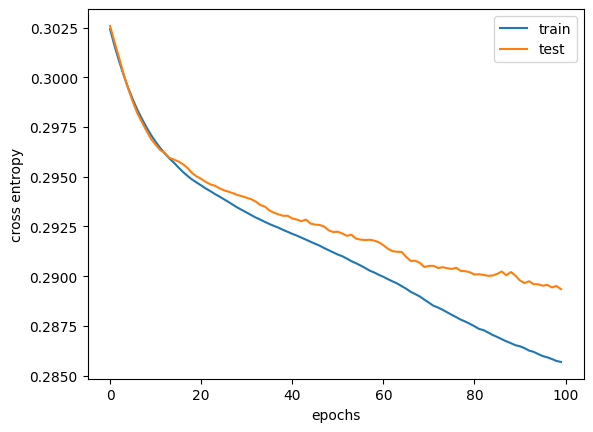

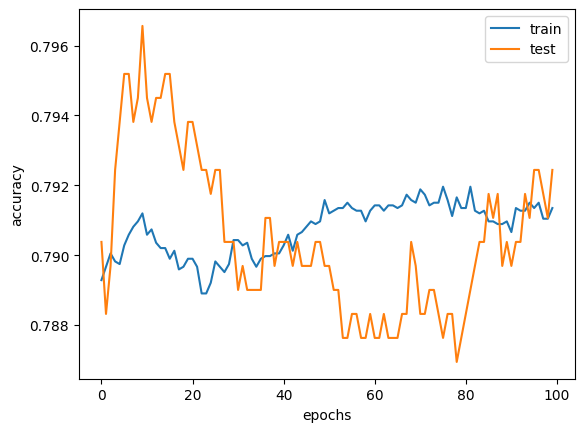

In [51]:
plt.plot(train_loss_hist, label="train")
plt.plot(test_loss_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("cross entropy")
plt.legend()
plt.show()

plt.plot(train_acc_hist, label="train")
plt.plot(test_acc_hist, label="test")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [53]:
def most_likely(input): 
    idx = input.argmax(axis=1)
    '''
    out = np.zeros_like(input,dtype=float)
    out[np.arange(input.shape[0]), idx] = 1
    '''        
    return idx


with torch.no_grad():
    y_pred = model(X_test)
matches = sum(x == y for x, y in zip(most_likely(y_pred), most_likely(y_test)))
accuracy = matches/len(y_test)
print(f"Accuracy {accuracy}")

predictions = most_likely(model(X_test))
expectVals = most_likely(y_test)
#print(predictions)
print(rounds_df.columns)
for i in range(15):
    print('%s => %s (expected %s)' % (X_test[i].tolist(), predictions[i].tolist(), expectVals[i].tolist()))

Accuracy 0.7965635657310486
Index(['Round score', 'Sig_Strikes_Attempted', 'Sig_Strikes_Attempted_Opp',
       'Sig_Strikes_Landed', 'Sig_Strikes_Landed_Opp', 'KD', 'KD_Opp', 'TD',
       'TD_Opp', 'Sub_Attempts', 'Sub_Attempts_Opp', 'Ctrl_Time',
       'Ctrl_Time_Opp', 'Head_Strikes', 'Head_Strikes_Opp'],
      dtype='object')
[46.0, 66.0, 8.0, 32.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 34.0, 0.0, 5.0, 17.0] => 3 (expected 3)
[33.0, 28.0, 12.0, 9.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 5.0] => 1 (expected 1)
[0.0, 15.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 292.0, 0.0, 10.0] => 3 (expected 3)
[126.0, 72.0, 71.0, 35.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 14.0, 46.0, 27.0] => 1 (expected 1)
[44.0, 21.0, 21.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 54.0, 12.0, 4.0] => 1 (expected 1)
[23.0, 2.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 276.0, 1.0, 15.0, 0.0] => 1 (expected 1)
[13.0, 17.0, 6.0, 10.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 174.0, 111.0, 6.0, 10.0] => 3 (expected 1)
[29.0, 3

As demonstrated, our initial estimation accuracy is generally acceptable at 80%. Our problem is unique because the Y values of round score for our training/test sets aren't necessarily correct and contain a bit of arbitrary nature due to the 'rampant' human error in UFC judging. Assuming something like 90% of judging rounds are publicly viewed as correct, an 80% or higher accuracy would be more than acceptable. The above data shows that much of the error lies in scoring close round between 1 <-> -1, 1 <-> 2, and -1 <-> -2. A problem we encounter could be class imbalance since the ration of 10-8's is much smaller than the ratio of 10-9's.